In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        notebook=True, early_stop=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        scheduler, model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, 
                                            early_stop=early_stop)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f8924494780>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f89244947f0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f88fb20af98>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import *
from mlp.optimisers import Optimiser
from mlp.schedulers import *

SGD

Epoch 1: 10.5s to complete
    error(train)=8.98e-01, acc(train)=7.21e-01, error(valid)=9.19e-01, acc(valid)=7.15e-01


Epoch 2: 10.2s to complete
    error(train)=6.81e-01, acc(train)=7.81e-01, error(valid)=7.10e-01, acc(valid)=7.73e-01


Epoch 3: 9.4s to complete
    error(train)=5.83e-01, acc(train)=8.09e-01, error(valid)=6.28e-01, acc(valid)=7.99e-01


Epoch 4: 9.1s to complete
    error(train)=5.28e-01, acc(train)=8.26e-01, error(valid)=5.83e-01, acc(valid)=8.10e-01


Epoch 5: 10.4s to complete
    error(train)=4.94e-01, acc(train)=8.34e-01, error(valid)=5.56e-01, acc(valid)=8.15e-01


Epoch 6: 10.4s to complete
    error(train)=5.02e-01, acc(train)=8.27e-01, error(valid)=5.81e-01, acc(valid)=8.06e-01


Epoch 7: 10.0s to complete
    error(train)=4.52e-01, acc(train)=8.43e-01, error(valid)=5.34e-01, acc(valid)=8.20e-01


Epoch 8: 9.5s to complete
    error(train)=4.25e-01, acc(train)=8.53e-01, error(valid)=5.21e-01, acc(valid)=8.25e-01


Epoch 9: 11.2s to complete
    error(train)=4.15e-01, acc(train)=8.55e-01, error(valid)=5.25e-01, acc(valid)=8.24e-01


Epoch 10: 9.6s to complete
    error(train)=4.02e-01, acc(train)=8.57e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


Epoch 11: 11.8s to complete
    error(train)=3.87e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.30e-01


Epoch 12: 11.8s to complete
    error(train)=3.65e-01, acc(train)=8.70e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


Epoch 13: 13.0s to complete
    error(train)=3.56e-01, acc(train)=8.73e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 14: 11.8s to complete
    error(train)=3.46e-01, acc(train)=8.73e-01, error(valid)=4.89e-01, acc(valid)=8.36e-01


Epoch 15: 10.4s to complete
    error(train)=3.45e-01, acc(train)=8.75e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


Epoch 16: 10.0s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


Epoch 17: 11.0s to complete
    error(train)=3.34e-01, acc(train)=8.76e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


Epoch 18: 11.8s to complete
    error(train)=3.20e-01, acc(train)=8.81e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


Epoch 19: 12.5s to complete
    error(train)=3.03e-01, acc(train)=8.88e-01, error(valid)=4.96e-01, acc(valid)=8.43e-01


Epoch 20: 10.9s to complete
    error(train)=3.13e-01, acc(train)=8.84e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


Epoch 21: 10.1s to complete
    error(train)=3.10e-01, acc(train)=8.79e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


Epoch 22: 11.0s to complete
    error(train)=3.09e-01, acc(train)=8.84e-01, error(valid)=5.27e-01, acc(valid)=8.31e-01


Epoch 23: 8.6s to complete
    error(train)=2.89e-01, acc(train)=8.92e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01


Epoch 24: 11.0s to complete
    error(train)=2.99e-01, acc(train)=8.86e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


Epoch 25: 9.7s to complete
    error(train)=2.77e-01, acc(train)=8.94e-01, error(valid)=5.28e-01, acc(valid)=8.34e-01


Epoch 26: 10.7s to complete
    error(train)=3.11e-01, acc(train)=8.80e-01, error(valid)=5.65e-01, acc(valid)=8.24e-01


Epoch 27: 9.9s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=5.27e-01, acc(valid)=8.37e-01


Epoch 28: 9.5s to complete
    error(train)=2.61e-01, acc(train)=9.01e-01, error(valid)=5.42e-01, acc(valid)=8.38e-01


Epoch 29: 9.4s to complete
    error(train)=2.62e-01, acc(train)=8.99e-01, error(valid)=5.42e-01, acc(valid)=8.33e-01


Epoch 30: 9.6s to complete
    error(train)=2.66e-01, acc(train)=8.97e-01, error(valid)=5.57e-01, acc(valid)=8.31e-01


Epoch 31: 9.7s to complete
    error(train)=2.64e-01, acc(train)=8.98e-01, error(valid)=5.65e-01, acc(valid)=8.31e-01


Epoch 32: 10.1s to complete
    error(train)=2.56e-01, acc(train)=8.99e-01, error(valid)=5.69e-01, acc(valid)=8.30e-01


Epoch 33: 11.0s to complete
    error(train)=2.38e-01, acc(train)=9.08e-01, error(valid)=5.56e-01, acc(valid)=8.34e-01


Epoch 34: 10.1s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.81e-01, acc(valid)=8.30e-01


Epoch 35: 10.8s to complete
    error(train)=2.41e-01, acc(train)=9.06e-01, error(valid)=5.81e-01, acc(valid)=8.31e-01


Epoch 36: 10.3s to complete
    error(train)=2.44e-01, acc(train)=9.03e-01, error(valid)=5.90e-01, acc(valid)=8.30e-01


Epoch 37: 10.6s to complete
    error(train)=2.40e-01, acc(train)=9.04e-01, error(valid)=5.95e-01, acc(valid)=8.30e-01


Epoch 38: 10.5s to complete
    error(train)=2.41e-01, acc(train)=9.04e-01, error(valid)=6.20e-01, acc(valid)=8.26e-01


Epoch 39: 9.9s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=6.01e-01, acc(valid)=8.33e-01


Epoch 40: 10.8s to complete
    error(train)=2.20e-01, acc(train)=9.14e-01, error(valid)=6.06e-01, acc(valid)=8.30e-01


Epoch 41: 10.6s to complete
    error(train)=2.35e-01, acc(train)=9.07e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01


Epoch 42: 11.3s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=6.21e-01, acc(valid)=8.31e-01


Epoch 43: 11.6s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=6.45e-01, acc(valid)=8.29e-01


Epoch 44: 11.8s to complete
    error(train)=2.37e-01, acc(train)=9.06e-01, error(valid)=6.74e-01, acc(valid)=8.25e-01


Epoch 45: 14.8s to complete
    error(train)=2.25e-01, acc(train)=9.10e-01, error(valid)=6.66e-01, acc(valid)=8.25e-01


Epoch 46: 12.5s to complete
    error(train)=2.08e-01, acc(train)=9.15e-01, error(valid)=6.52e-01, acc(valid)=8.29e-01


Epoch 47: 10.3s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=6.67e-01, acc(valid)=8.31e-01


Epoch 48: 9.9s to complete
    error(train)=2.13e-01, acc(train)=9.14e-01, error(valid)=6.71e-01, acc(valid)=8.23e-01


Epoch 49: 10.4s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=6.74e-01, acc(valid)=8.28e-01


Epoch 50: 9.3s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=6.76e-01, acc(valid)=8.23e-01


Epoch 51: 9.0s to complete
    error(train)=1.97e-01, acc(train)=9.19e-01, error(valid)=6.87e-01, acc(valid)=8.27e-01


Epoch 52: 9.9s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=6.75e-01, acc(valid)=8.26e-01


Epoch 53: 12.9s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=6.81e-01, acc(valid)=8.32e-01


Epoch 54: 11.0s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=7.21e-01, acc(valid)=8.28e-01


Epoch 55: 10.7s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=7.08e-01, acc(valid)=8.27e-01


Epoch 56: 11.0s to complete
    error(train)=2.11e-01, acc(train)=9.16e-01, error(valid)=7.30e-01, acc(valid)=8.24e-01


Epoch 57: 11.8s to complete
    error(train)=1.86e-01, acc(train)=9.24e-01, error(valid)=7.21e-01, acc(valid)=8.28e-01


Epoch 58: 10.7s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=7.52e-01, acc(valid)=8.22e-01


Epoch 59: 11.0s to complete
    error(train)=1.96e-01, acc(train)=9.19e-01, error(valid)=7.29e-01, acc(valid)=8.21e-01


Epoch 60: 10.9s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=7.62e-01, acc(valid)=8.24e-01


Epoch 61: 11.1s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=7.89e-01, acc(valid)=8.20e-01


Epoch 62: 11.0s to complete
    error(train)=1.91e-01, acc(train)=9.21e-01, error(valid)=7.77e-01, acc(valid)=8.21e-01


Epoch 63: 13.5s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=7.87e-01, acc(valid)=8.20e-01


Epoch 64: 17.5s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=8.03e-01, acc(valid)=8.16e-01


Epoch 65: 14.5s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=7.72e-01, acc(valid)=8.21e-01


Epoch 66: 10.9s to complete
    error(train)=1.84e-01, acc(train)=9.24e-01, error(valid)=7.94e-01, acc(valid)=8.22e-01


Epoch 67: 9.8s to complete
    error(train)=1.85e-01, acc(train)=9.23e-01, error(valid)=7.87e-01, acc(valid)=8.20e-01


Epoch 68: 10.4s to complete
    error(train)=1.76e-01, acc(train)=9.26e-01, error(valid)=7.99e-01, acc(valid)=8.22e-01


Epoch 69: 13.5s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.91e-01, acc(valid)=8.23e-01


Epoch 70: 9.5s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=8.20e-01, acc(valid)=8.21e-01


Epoch 71: 6.3s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=8.41e-01, acc(valid)=8.18e-01


Epoch 72: 7.8s to complete
    error(train)=1.84e-01, acc(train)=9.23e-01, error(valid)=8.34e-01, acc(valid)=8.18e-01


Epoch 73: 5.4s to complete
    error(train)=1.73e-01, acc(train)=9.28e-01, error(valid)=8.34e-01, acc(valid)=8.20e-01


Epoch 74: 5.5s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=8.70e-01, acc(valid)=8.16e-01


Epoch 75: 5.6s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=8.84e-01, acc(valid)=8.18e-01


Epoch 76: 5.6s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=8.48e-01, acc(valid)=8.23e-01


Epoch 77: 6.6s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=8.95e-01, acc(valid)=8.19e-01


Epoch 78: 6.3s to complete
    error(train)=1.69e-01, acc(train)=9.30e-01, error(valid)=8.59e-01, acc(valid)=8.20e-01


Epoch 79: 6.2s to complete
    error(train)=1.66e-01, acc(train)=9.31e-01, error(valid)=8.64e-01, acc(valid)=8.19e-01


Epoch 80: 5.2s to complete
    error(train)=1.71e-01, acc(train)=9.28e-01, error(valid)=8.85e-01, acc(valid)=8.19e-01


Epoch 81: 5.3s to complete
    error(train)=1.69e-01, acc(train)=9.30e-01, error(valid)=8.93e-01, acc(valid)=8.22e-01


Epoch 82: 5.5s to complete
    error(train)=1.82e-01, acc(train)=9.26e-01, error(valid)=9.34e-01, acc(valid)=8.18e-01


Epoch 83: 6.2s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=9.55e-01, acc(valid)=8.16e-01


Epoch 84: 5.7s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=9.15e-01, acc(valid)=8.18e-01


Epoch 85: 5.5s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=9.56e-01, acc(valid)=8.09e-01


Epoch 86: 5.6s to complete
    error(train)=1.91e-01, acc(train)=9.25e-01, error(valid)=9.56e-01, acc(valid)=8.16e-01


Epoch 87: 5.6s to complete
    error(train)=1.78e-01, acc(train)=9.27e-01, error(valid)=9.63e-01, acc(valid)=8.16e-01


Epoch 88: 4.6s to complete
    error(train)=2.33e-01, acc(train)=9.11e-01, error(valid)=1.01e+00, acc(valid)=8.07e-01


Epoch 89: 6.2s to complete
    error(train)=1.87e-01, acc(train)=9.26e-01, error(valid)=9.86e-01, acc(valid)=8.14e-01


Epoch 90: 5.2s to complete
    error(train)=1.66e-01, acc(train)=9.31e-01, error(valid)=9.37e-01, acc(valid)=8.15e-01


Epoch 91: 5.7s to complete
    error(train)=1.76e-01, acc(train)=9.27e-01, error(valid)=9.69e-01, acc(valid)=8.10e-01


Epoch 92: 5.2s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=9.84e-01, acc(valid)=8.18e-01


Epoch 93: 5.3s to complete
    error(train)=1.95e-01, acc(train)=9.23e-01, error(valid)=1.03e+00, acc(valid)=8.12e-01


Epoch 94: 5.6s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=9.86e-01, acc(valid)=8.18e-01


Epoch 95: 5.2s to complete
    error(train)=1.86e-01, acc(train)=9.27e-01, error(valid)=1.00e+00, acc(valid)=8.18e-01


Epoch 96: 5.3s to complete
    error(train)=1.70e-01, acc(train)=9.30e-01, error(valid)=1.01e+00, acc(valid)=8.14e-01


Epoch 97: 5.2s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=1.03e+00, acc(valid)=8.16e-01


Epoch 98: 5.7s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=1.01e+00, acc(valid)=8.18e-01


Epoch 99: 5.2s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=1.03e+00, acc(valid)=8.18e-01


Epoch 100: 5.1s to complete
    error(train)=1.74e-01, acc(train)=9.28e-01, error(valid)=1.04e+00, acc(valid)=8.13e-01


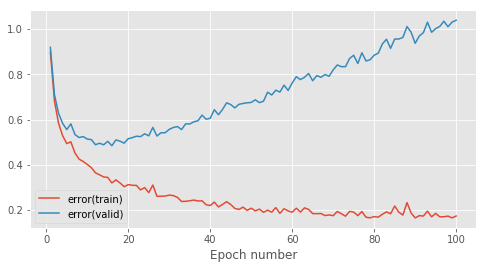

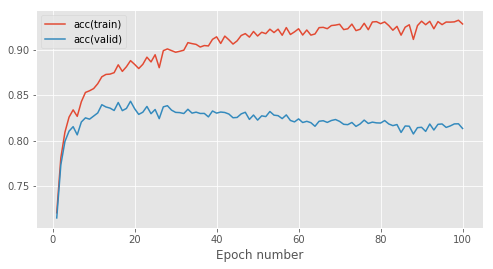

In [4]:
# SGD 3 layers constant scheduler
run_times = 1
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats_sgd_constant = sum_stats/run_times

Epoch 1: 5.6s to complete
    error(train)=7.73e-01, acc(train)=7.50e-01, error(valid)=7.99e-01, acc(valid)=7.48e-01


Epoch 2: 5.5s to complete
    error(train)=5.97e-01, acc(train)=8.03e-01, error(valid)=6.36e-01, acc(valid)=7.91e-01


Epoch 3: 5.6s to complete
    error(train)=5.12e-01, acc(train)=8.27e-01, error(valid)=5.68e-01, acc(valid)=8.14e-01


Epoch 4: 5.7s to complete
    error(train)=4.76e-01, acc(train)=8.37e-01, error(valid)=5.44e-01, acc(valid)=8.19e-01


Epoch 5: 5.4s to complete
    error(train)=4.50e-01, acc(train)=8.43e-01, error(valid)=5.40e-01, acc(valid)=8.17e-01


Epoch 6: 5.3s to complete
    error(train)=4.25e-01, acc(train)=8.48e-01, error(valid)=5.30e-01, acc(valid)=8.21e-01


Epoch 7: 5.7s to complete
    error(train)=4.24e-01, acc(train)=8.48e-01, error(valid)=5.42e-01, acc(valid)=8.19e-01


Epoch 8: 5.4s to complete
    error(train)=4.13e-01, acc(train)=8.54e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


Epoch 9: 5.6s to complete
    error(train)=3.74e-01, acc(train)=8.65e-01, error(valid)=5.12e-01, acc(valid)=8.30e-01


Epoch 10: 5.6s to complete
    error(train)=3.55e-01, acc(train)=8.71e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


Epoch 11: 5.0s to complete
    error(train)=3.55e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


Epoch 12: 6.7s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


Epoch 13: 5.2s to complete
    error(train)=3.18e-01, acc(train)=8.83e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


Epoch 14: 5.7s to complete
    error(train)=3.38e-01, acc(train)=8.74e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


Epoch 15: 5.1s to complete
    error(train)=3.18e-01, acc(train)=8.81e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


Epoch 16: 5.6s to complete
    error(train)=3.22e-01, acc(train)=8.79e-01, error(valid)=5.50e-01, acc(valid)=8.26e-01


Epoch 17: 5.3s to complete
    error(train)=3.00e-01, acc(train)=8.87e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


Epoch 18: 5.2s to complete
    error(train)=2.89e-01, acc(train)=8.90e-01, error(valid)=5.39e-01, acc(valid)=8.31e-01


Epoch 19: 5.6s to complete
    error(train)=2.99e-01, acc(train)=8.85e-01, error(valid)=5.61e-01, acc(valid)=8.29e-01


Epoch 20: 5.6s to complete
    error(train)=2.81e-01, acc(train)=8.91e-01, error(valid)=5.57e-01, acc(valid)=8.29e-01


Epoch 21: 5.4s to complete
    error(train)=2.89e-01, acc(train)=8.88e-01, error(valid)=5.66e-01, acc(valid)=8.30e-01


Epoch 22: 5.4s to complete
    error(train)=2.70e-01, acc(train)=8.95e-01, error(valid)=5.66e-01, acc(valid)=8.29e-01


Epoch 23: 5.5s to complete
    error(train)=2.90e-01, acc(train)=8.88e-01, error(valid)=5.87e-01, acc(valid)=8.25e-01


Epoch 24: 5.4s to complete
    error(train)=2.58e-01, acc(train)=9.00e-01, error(valid)=5.72e-01, acc(valid)=8.34e-01


Epoch 25: 5.5s to complete
    error(train)=2.73e-01, acc(train)=8.93e-01, error(valid)=6.06e-01, acc(valid)=8.26e-01


Epoch 26: 5.3s to complete
    error(train)=2.78e-01, acc(train)=8.90e-01, error(valid)=5.99e-01, acc(valid)=8.22e-01


Epoch 27: 7.5s to complete
    error(train)=2.56e-01, acc(train)=9.00e-01, error(valid)=5.96e-01, acc(valid)=8.29e-01


Epoch 28: 5.9s to complete
    error(train)=2.53e-01, acc(train)=9.01e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01


Epoch 29: 6.2s to complete
    error(train)=2.53e-01, acc(train)=9.01e-01, error(valid)=6.07e-01, acc(valid)=8.31e-01


Epoch 30: 4.8s to complete
    error(train)=2.39e-01, acc(train)=9.05e-01, error(valid)=6.07e-01, acc(valid)=8.31e-01


Epoch 31: 5.7s to complete
    error(train)=2.35e-01, acc(train)=9.07e-01, error(valid)=6.16e-01, acc(valid)=8.32e-01


Epoch 32: 7.4s to complete
    error(train)=2.46e-01, acc(train)=9.01e-01, error(valid)=6.41e-01, acc(valid)=8.25e-01


Epoch 33: 6.0s to complete
    error(train)=2.51e-01, acc(train)=9.02e-01, error(valid)=6.58e-01, acc(valid)=8.27e-01


Epoch 34: 6.5s to complete
    error(train)=2.44e-01, acc(train)=9.03e-01, error(valid)=6.62e-01, acc(valid)=8.24e-01


Epoch 35: 5.6s to complete
    error(train)=2.28e-01, acc(train)=9.09e-01, error(valid)=6.47e-01, acc(valid)=8.30e-01


Epoch 36: 6.0s to complete
    error(train)=2.37e-01, acc(train)=9.05e-01, error(valid)=6.72e-01, acc(valid)=8.23e-01


Epoch 37: 5.5s to complete
    error(train)=2.28e-01, acc(train)=9.07e-01, error(valid)=6.59e-01, acc(valid)=8.23e-01


Epoch 38: 5.5s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=6.75e-01, acc(valid)=8.25e-01


Epoch 39: 6.2s to complete
    error(train)=2.23e-01, acc(train)=9.10e-01, error(valid)=6.77e-01, acc(valid)=8.25e-01


Epoch 40: 6.5s to complete
    error(train)=2.35e-01, acc(train)=9.06e-01, error(valid)=7.03e-01, acc(valid)=8.23e-01


Epoch 41: 6.3s to complete
    error(train)=2.16e-01, acc(train)=9.12e-01, error(valid)=6.89e-01, acc(valid)=8.27e-01


Epoch 42: 6.8s to complete
    error(train)=2.14e-01, acc(train)=9.13e-01, error(valid)=7.04e-01, acc(valid)=8.27e-01


Epoch 43: 5.5s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=7.35e-01, acc(valid)=8.24e-01


Epoch 44: 6.1s to complete
    error(train)=2.32e-01, acc(train)=9.07e-01, error(valid)=7.75e-01, acc(valid)=8.19e-01


Epoch 45: 5.6s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=7.11e-01, acc(valid)=8.27e-01


Epoch 46: 7.3s to complete
    error(train)=1.99e-01, acc(train)=9.19e-01, error(valid)=7.33e-01, acc(valid)=8.24e-01


Epoch 47: 6.7s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=7.71e-01, acc(valid)=8.22e-01


Epoch 48: 6.4s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=7.63e-01, acc(valid)=8.27e-01


Epoch 49: 6.9s to complete
    error(train)=2.14e-01, acc(train)=9.12e-01, error(valid)=7.66e-01, acc(valid)=8.19e-01


Epoch 50: 7.0s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=7.97e-01, acc(valid)=8.22e-01


Epoch 51: 7.5s to complete
    error(train)=2.07e-01, acc(train)=9.16e-01, error(valid)=8.09e-01, acc(valid)=8.22e-01


Epoch 52: 6.6s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=8.01e-01, acc(valid)=8.20e-01


Epoch 53: 6.5s to complete
    error(train)=1.93e-01, acc(train)=9.20e-01, error(valid)=7.87e-01, acc(valid)=8.26e-01


Epoch 54: 5.9s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=8.08e-01, acc(valid)=8.29e-01


Epoch 55: 5.7s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=8.26e-01, acc(valid)=8.23e-01


Epoch 56: 6.5s to complete
    error(train)=1.96e-01, acc(train)=9.20e-01, error(valid)=8.28e-01, acc(valid)=8.25e-01


Epoch 57: 5.4s to complete
    error(train)=1.86e-01, acc(train)=9.22e-01, error(valid)=8.31e-01, acc(valid)=8.22e-01


Epoch 58: 6.1s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=8.67e-01, acc(valid)=8.18e-01


Epoch 59: 6.1s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=8.36e-01, acc(valid)=8.19e-01


Epoch 60: 5.8s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=8.89e-01, acc(valid)=8.17e-01


Epoch 61: 6.0s to complete
    error(train)=1.98e-01, acc(train)=9.22e-01, error(valid)=8.97e-01, acc(valid)=8.18e-01


Epoch 62: 5.8s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=9.08e-01, acc(valid)=8.19e-01


Epoch 63: 5.7s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=9.00e-01, acc(valid)=8.21e-01


Epoch 64: 5.6s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=9.28e-01, acc(valid)=8.20e-01


Epoch 65: 5.7s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=9.09e-01, acc(valid)=8.22e-01


Epoch 66: 5.8s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=9.21e-01, acc(valid)=8.20e-01


Epoch 67: 6.8s to complete
    error(train)=1.60e-01, acc(train)=9.33e-01, error(valid)=9.32e-01, acc(valid)=8.19e-01


Epoch 68: 5.6s to complete
    error(train)=1.60e-01, acc(train)=9.32e-01, error(valid)=9.42e-01, acc(valid)=8.22e-01


Epoch 69: 6.0s to complete
    error(train)=1.56e-01, acc(train)=9.35e-01, error(valid)=9.59e-01, acc(valid)=8.18e-01


Epoch 70: 7.0s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=9.70e-01, acc(valid)=8.21e-01


Epoch 71: 4.7s to complete
    error(train)=1.53e-01, acc(train)=9.36e-01, error(valid)=9.54e-01, acc(valid)=8.23e-01


Epoch 72: 6.7s to complete
    error(train)=1.46e-01, acc(train)=9.39e-01, error(valid)=9.81e-01, acc(valid)=8.24e-01


Epoch 73: 8.5s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=1.02e+00, acc(valid)=8.17e-01


Epoch 74: 7.8s to complete
    error(train)=1.45e-01, acc(train)=9.39e-01, error(valid)=1.03e+00, acc(valid)=8.24e-01


Epoch 75: 6.1s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=1.04e+00, acc(valid)=8.23e-01


Epoch 76: 5.5s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=1.04e+00, acc(valid)=8.17e-01


Epoch 77: 5.6s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=1.03e+00, acc(valid)=8.21e-01


Epoch 78: 7.1s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


Epoch 79: 6.3s to complete
    error(train)=1.27e-01, acc(train)=9.45e-01, error(valid)=1.06e+00, acc(valid)=8.22e-01


Epoch 80: 6.1s to complete
    error(train)=1.36e-01, acc(train)=9.43e-01, error(valid)=1.10e+00, acc(valid)=8.20e-01


Epoch 81: 6.7s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.11e+00, acc(valid)=8.12e-01


Epoch 82: 6.7s to complete
    error(train)=1.21e-01, acc(train)=9.49e-01, error(valid)=1.12e+00, acc(valid)=8.21e-01


Epoch 83: 7.6s to complete
    error(train)=1.18e-01, acc(train)=9.50e-01, error(valid)=1.12e+00, acc(valid)=8.20e-01


Epoch 84: 8.0s to complete
    error(train)=1.08e-01, acc(train)=9.55e-01, error(valid)=1.12e+00, acc(valid)=8.24e-01


Epoch 85: 6.1s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.16e+00, acc(valid)=8.23e-01


Epoch 86: 7.5s to complete
    error(train)=1.07e-01, acc(train)=9.55e-01, error(valid)=1.17e+00, acc(valid)=8.20e-01


Epoch 87: 6.3s to complete
    error(train)=1.06e-01, acc(train)=9.55e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


Epoch 88: 6.0s to complete
    error(train)=1.13e-01, acc(train)=9.53e-01, error(valid)=1.20e+00, acc(valid)=8.20e-01


Epoch 89: 7.0s to complete
    error(train)=1.16e-01, acc(train)=9.51e-01, error(valid)=1.21e+00, acc(valid)=8.20e-01


Epoch 90: 6.8s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.20e+00, acc(valid)=8.20e-01


Epoch 91: 5.8s to complete
    error(train)=1.04e-01, acc(train)=9.56e-01, error(valid)=1.23e+00, acc(valid)=8.21e-01


Epoch 92: 6.9s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.25e+00, acc(valid)=8.20e-01


Epoch 93: 7.0s to complete
    error(train)=9.38e-02, acc(train)=9.61e-01, error(valid)=1.23e+00, acc(valid)=8.21e-01


Epoch 94: 5.6s to complete
    error(train)=8.87e-02, acc(train)=9.63e-01, error(valid)=1.25e+00, acc(valid)=8.25e-01


Epoch 95: 5.8s to complete
    error(train)=8.82e-02, acc(train)=9.63e-01, error(valid)=1.29e+00, acc(valid)=8.23e-01


Epoch 96: 5.6s to complete
    error(train)=8.27e-02, acc(train)=9.65e-01, error(valid)=1.29e+00, acc(valid)=8.20e-01


Epoch 97: 5.7s to complete
    error(train)=8.69e-02, acc(train)=9.65e-01, error(valid)=1.33e+00, acc(valid)=8.21e-01


Epoch 98: 6.2s to complete
    error(train)=7.43e-02, acc(train)=9.69e-01, error(valid)=1.30e+00, acc(valid)=8.23e-01


Epoch 99: 5.6s to complete
    error(train)=7.36e-02, acc(train)=9.70e-01, error(valid)=1.37e+00, acc(valid)=8.22e-01


Epoch 100: 5.6s to complete
    error(train)=7.47e-02, acc(train)=9.69e-01, error(valid)=1.33e+00, acc(valid)=8.22e-01


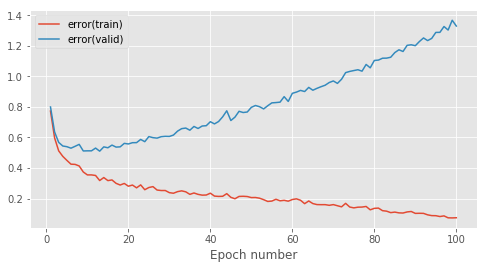

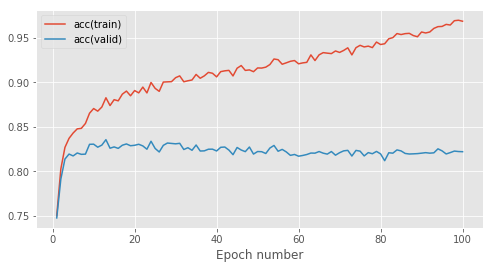

In [5]:
# SGD 3 layers no restarts
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule()
min_learning_rate = 0.001
max_learning_rate = 0.2
total_iters_per_period = 200
max_learning_rate_discount_factor = 1
period_iteration_expansion_factor = 1
scheduler = CosineAnnealingWithWarmRestarts(
    min_learning_rate, max_learning_rate, total_iters_per_period, 
    max_learning_rate_discount_factor, period_iteration_expansion_factor)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

sum_stats = np.sum(five_stats,axis=0)
stats_sgd_no_restarts = sum_stats/run_times

Epoch 1: 5.7s to complete
    error(train)=7.69e-01, acc(train)=7.57e-01, error(valid)=7.90e-01, acc(valid)=7.50e-01


Epoch 2: 5.4s to complete
    error(train)=5.94e-01, acc(train)=8.06e-01, error(valid)=6.37e-01, acc(valid)=7.93e-01


Epoch 3: 6.4s to complete
    error(train)=5.19e-01, acc(train)=8.25e-01, error(valid)=5.78e-01, acc(valid)=8.12e-01


Epoch 4: 6.1s to complete
    error(train)=4.88e-01, acc(train)=8.33e-01, error(valid)=5.64e-01, acc(valid)=8.15e-01


Epoch 5: 5.9s to complete
    error(train)=4.65e-01, acc(train)=8.36e-01, error(valid)=5.47e-01, acc(valid)=8.15e-01


Epoch 6: 5.3s to complete
    error(train)=4.47e-01, acc(train)=8.41e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


Epoch 7: 6.1s to complete
    error(train)=4.16e-01, acc(train)=8.48e-01, error(valid)=5.22e-01, acc(valid)=8.22e-01


Epoch 8: 8.1s to complete
    error(train)=3.72e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


Epoch 9: 5.7s to complete
    error(train)=3.62e-01, acc(train)=8.69e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


Epoch 10: 7.6s to complete
    error(train)=3.47e-01, acc(train)=8.72e-01, error(valid)=4.91e-01, acc(valid)=8.36e-01


Epoch 11: 8.0s to complete
    error(train)=3.35e-01, acc(train)=8.78e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


Epoch 12: 9.5s to complete
    error(train)=3.17e-01, acc(train)=8.82e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


Epoch 13: 12.8s to complete
    error(train)=2.97e-01, acc(train)=8.90e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


Epoch 14: 13.1s to complete
    error(train)=2.81e-01, acc(train)=8.97e-01, error(valid)=4.79e-01, acc(valid)=8.46e-01


Epoch 15: 11.6s to complete
    error(train)=2.70e-01, acc(train)=9.00e-01, error(valid)=4.77e-01, acc(valid)=8.47e-01


Epoch 16: 12.7s to complete
    error(train)=2.60e-01, acc(train)=9.04e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


Epoch 17: 11.9s to complete
    error(train)=2.51e-01, acc(train)=9.08e-01, error(valid)=4.77e-01, acc(valid)=8.48e-01


Epoch 18: 10.0s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=4.80e-01, acc(valid)=8.48e-01


Epoch 19: 9.6s to complete
    error(train)=2.39e-01, acc(train)=9.12e-01, error(valid)=4.83e-01, acc(valid)=8.50e-01


Epoch 20: 10.1s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=4.80e-01, acc(valid)=8.48e-01


Epoch 21: 10.8s to complete
    error(train)=2.30e-01, acc(train)=9.16e-01, error(valid)=4.84e-01, acc(valid)=8.51e-01


Epoch 22: 10.4s to complete
    error(train)=2.28e-01, acc(train)=9.17e-01, error(valid)=4.82e-01, acc(valid)=8.50e-01


Epoch 23: 10.2s to complete
    error(train)=2.27e-01, acc(train)=9.18e-01, error(valid)=4.82e-01, acc(valid)=8.51e-01


Epoch 24: 10.4s to complete
    error(train)=2.26e-01, acc(train)=9.18e-01, error(valid)=4.82e-01, acc(valid)=8.50e-01


Epoch 25: 9.8s to complete
    error(train)=3.52e-01, acc(train)=8.68e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


Epoch 26: 10.7s to complete
    error(train)=3.19e-01, acc(train)=8.81e-01, error(valid)=5.43e-01, acc(valid)=8.31e-01


Epoch 27: 9.6s to complete
    error(train)=3.37e-01, acc(train)=8.76e-01, error(valid)=5.59e-01, acc(valid)=8.26e-01


Epoch 28: 9.9s to complete
    error(train)=3.24e-01, acc(train)=8.77e-01, error(valid)=5.62e-01, acc(valid)=8.26e-01


Epoch 29: 10.5s to complete
    error(train)=3.08e-01, acc(train)=8.85e-01, error(valid)=5.60e-01, acc(valid)=8.30e-01


Epoch 30: 10.6s to complete
    error(train)=3.08e-01, acc(train)=8.84e-01, error(valid)=5.62e-01, acc(valid)=8.24e-01


Epoch 31: 9.0s to complete
    error(train)=2.97e-01, acc(train)=8.86e-01, error(valid)=5.58e-01, acc(valid)=8.28e-01


Epoch 32: 10.5s to complete
    error(train)=3.14e-01, acc(train)=8.77e-01, error(valid)=5.86e-01, acc(valid)=8.19e-01


Epoch 33: 11.1s to complete
    error(train)=2.81e-01, acc(train)=8.91e-01, error(valid)=5.67e-01, acc(valid)=8.31e-01


Epoch 34: 9.7s to complete
    error(train)=2.71e-01, acc(train)=8.92e-01, error(valid)=5.70e-01, acc(valid)=8.30e-01


Epoch 35: 9.5s to complete
    error(train)=2.75e-01, acc(train)=8.93e-01, error(valid)=5.79e-01, acc(valid)=8.29e-01


Epoch 36: 9.1s to complete
    error(train)=2.54e-01, acc(train)=8.99e-01, error(valid)=5.66e-01, acc(valid)=8.34e-01


Epoch 37: 9.5s to complete
    error(train)=2.58e-01, acc(train)=8.98e-01, error(valid)=5.86e-01, acc(valid)=8.29e-01


Epoch 38: 9.4s to complete
    error(train)=2.49e-01, acc(train)=9.03e-01, error(valid)=5.82e-01, acc(valid)=8.31e-01


Epoch 39: 10.7s to complete
    error(train)=2.73e-01, acc(train)=8.94e-01, error(valid)=6.26e-01, acc(valid)=8.24e-01


Epoch 40: 9.4s to complete
    error(train)=2.48e-01, acc(train)=9.02e-01, error(valid)=6.15e-01, acc(valid)=8.27e-01


Epoch 41: 9.1s to complete
    error(train)=2.77e-01, acc(train)=8.93e-01, error(valid)=6.68e-01, acc(valid)=8.23e-01


Epoch 42: 10.3s to complete
    error(train)=2.44e-01, acc(train)=9.03e-01, error(valid)=6.49e-01, acc(valid)=8.22e-01


Epoch 43: 8.7s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=6.28e-01, acc(valid)=8.30e-01


Epoch 44: 9.1s to complete
    error(train)=2.23e-01, acc(train)=9.09e-01, error(valid)=6.41e-01, acc(valid)=8.28e-01


Epoch 45: 9.5s to complete
    error(train)=2.16e-01, acc(train)=9.12e-01, error(valid)=6.34e-01, acc(valid)=8.31e-01


Epoch 46: 9.9s to complete
    error(train)=2.25e-01, acc(train)=9.11e-01, error(valid)=6.71e-01, acc(valid)=8.27e-01


Epoch 47: 9.4s to complete
    error(train)=2.27e-01, acc(train)=9.09e-01, error(valid)=6.85e-01, acc(valid)=8.28e-01


Epoch 48: 9.6s to complete
    error(train)=2.00e-01, acc(train)=9.19e-01, error(valid)=6.68e-01, acc(valid)=8.30e-01


Epoch 49: 10.2s to complete
    error(train)=2.06e-01, acc(train)=9.17e-01, error(valid)=6.78e-01, acc(valid)=8.30e-01


Epoch 50: 10.8s to complete
    error(train)=2.02e-01, acc(train)=9.17e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01


Epoch 51: 10.5s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=7.07e-01, acc(valid)=8.23e-01


Epoch 52: 9.3s to complete
    error(train)=1.85e-01, acc(train)=9.23e-01, error(valid)=7.08e-01, acc(valid)=8.26e-01


Epoch 53: 9.8s to complete
    error(train)=1.75e-01, acc(train)=9.27e-01, error(valid)=7.06e-01, acc(valid)=8.25e-01


Epoch 54: 8.5s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.25e-01, acc(valid)=8.30e-01


Epoch 55: 9.2s to complete
    error(train)=1.70e-01, acc(train)=9.29e-01, error(valid)=7.35e-01, acc(valid)=8.24e-01


Epoch 56: 9.8s to complete
    error(train)=1.81e-01, acc(train)=9.25e-01, error(valid)=7.64e-01, acc(valid)=8.25e-01


Epoch 57: 9.9s to complete
    error(train)=1.60e-01, acc(train)=9.33e-01, error(valid)=7.51e-01, acc(valid)=8.26e-01


Epoch 58: 10.5s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=7.45e-01, acc(valid)=8.29e-01


Epoch 59: 9.2s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=7.60e-01, acc(valid)=8.29e-01


Epoch 60: 10.0s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=7.76e-01, acc(valid)=8.29e-01


Epoch 61: 9.8s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=7.76e-01, acc(valid)=8.29e-01


Epoch 62: 10.1s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=8.09e-01, acc(valid)=8.31e-01


Epoch 63: 9.9s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=8.14e-01, acc(valid)=8.29e-01


Epoch 64: 9.6s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=8.29e-01, acc(valid)=8.32e-01


Epoch 65: 9.8s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=8.42e-01, acc(valid)=8.29e-01


Epoch 66: 10.3s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=8.58e-01, acc(valid)=8.26e-01


Epoch 67: 10.2s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=8.56e-01, acc(valid)=8.30e-01


Epoch 68: 8.4s to complete
    error(train)=1.04e-01, acc(train)=9.59e-01, error(valid)=8.73e-01, acc(valid)=8.30e-01


Epoch 69: 5.2s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=8.81e-01, acc(valid)=8.29e-01


Epoch 70: 4.8s to complete
    error(train)=9.60e-02, acc(train)=9.62e-01, error(valid)=8.93e-01, acc(valid)=8.30e-01


Epoch 71: 5.4s to complete
    error(train)=9.41e-02, acc(train)=9.63e-01, error(valid)=9.03e-01, acc(valid)=8.28e-01


Epoch 72: 6.5s to complete
    error(train)=9.20e-02, acc(train)=9.64e-01, error(valid)=9.16e-01, acc(valid)=8.29e-01


Epoch 73: 5.6s to complete
    error(train)=9.05e-02, acc(train)=9.65e-01, error(valid)=9.20e-01, acc(valid)=8.28e-01


Epoch 74: 6.2s to complete
    error(train)=8.76e-02, acc(train)=9.66e-01, error(valid)=9.29e-01, acc(valid)=8.29e-01


Epoch 75: 5.5s to complete
    error(train)=8.70e-02, acc(train)=9.66e-01, error(valid)=9.37e-01, acc(valid)=8.28e-01


Epoch 76: 5.3s to complete
    error(train)=8.51e-02, acc(train)=9.67e-01, error(valid)=9.50e-01, acc(valid)=8.27e-01


Epoch 77: 5.5s to complete
    error(train)=8.36e-02, acc(train)=9.67e-01, error(valid)=9.59e-01, acc(valid)=8.28e-01


Epoch 78: 5.7s to complete
    error(train)=8.25e-02, acc(train)=9.69e-01, error(valid)=9.66e-01, acc(valid)=8.26e-01


Epoch 79: 5.5s to complete
    error(train)=7.94e-02, acc(train)=9.70e-01, error(valid)=9.71e-01, acc(valid)=8.26e-01


Epoch 80: 5.7s to complete
    error(train)=7.86e-02, acc(train)=9.70e-01, error(valid)=9.81e-01, acc(valid)=8.27e-01


Epoch 81: 5.9s to complete
    error(train)=7.74e-02, acc(train)=9.71e-01, error(valid)=9.88e-01, acc(valid)=8.26e-01


Epoch 82: 5.5s to complete
    error(train)=7.68e-02, acc(train)=9.72e-01, error(valid)=9.89e-01, acc(valid)=8.26e-01


Epoch 83: 5.3s to complete
    error(train)=7.58e-02, acc(train)=9.72e-01, error(valid)=9.95e-01, acc(valid)=8.28e-01


Epoch 84: 5.5s to complete
    error(train)=7.53e-02, acc(train)=9.72e-01, error(valid)=9.98e-01, acc(valid)=8.26e-01


Epoch 85: 5.6s to complete
    error(train)=7.43e-02, acc(train)=9.72e-01, error(valid)=1.00e+00, acc(valid)=8.26e-01


Epoch 86: 4.7s to complete
    error(train)=7.31e-02, acc(train)=9.73e-01, error(valid)=1.01e+00, acc(valid)=8.26e-01


Epoch 87: 5.3s to complete
    error(train)=7.27e-02, acc(train)=9.73e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


Epoch 88: 5.8s to complete
    error(train)=7.24e-02, acc(train)=9.73e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


Epoch 89: 6.6s to complete
    error(train)=7.21e-02, acc(train)=9.73e-01, error(valid)=1.02e+00, acc(valid)=8.26e-01


Epoch 90: 5.7s to complete
    error(train)=7.17e-02, acc(train)=9.74e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


Epoch 91: 5.5s to complete
    error(train)=7.11e-02, acc(train)=9.74e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


Epoch 92: 5.7s to complete
    error(train)=7.09e-02, acc(train)=9.74e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


Epoch 93: 5.5s to complete
    error(train)=7.08e-02, acc(train)=9.74e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


Epoch 94: 5.5s to complete
    error(train)=7.07e-02, acc(train)=9.74e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


Epoch 95: 5.7s to complete
    error(train)=7.05e-02, acc(train)=9.74e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


Epoch 96: 5.0s to complete
    error(train)=7.03e-02, acc(train)=9.74e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


Epoch 97: 5.3s to complete
    error(train)=7.03e-02, acc(train)=9.75e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


Epoch 98: 5.3s to complete
    error(train)=7.02e-02, acc(train)=9.75e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


Epoch 99: 5.4s to complete
    error(train)=7.02e-02, acc(train)=9.75e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


Epoch 100: 5.5s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=8.85e-01, acc(valid)=8.01e-01


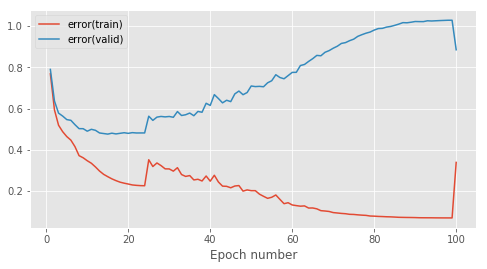

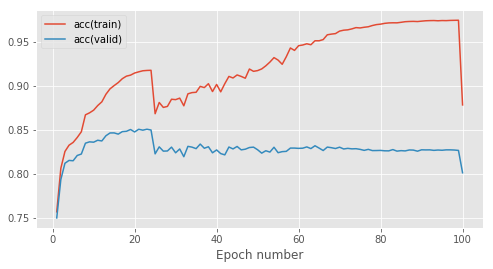

In [6]:
# SGD 3 layers restarts
error = CrossEntropySoftmaxError()
learning_rule = GradientDescentLearningRule()
min_learning_rate = 0.001
max_learning_rate = 0.2
total_iters_per_period = 25
max_learning_rate_discount_factor = 0.9
period_iteration_expansion_factor = 3
scheduler = CosineAnnealingWithWarmRestarts(
    min_learning_rate, max_learning_rate, total_iters_per_period, 
    max_learning_rate_discount_factor, period_iteration_expansion_factor)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats

sum_stats = np.sum(five_stats,axis=0)
stats_sgd_restarts = sum_stats/run_times

Adam

Epoch 1: 8.5s to complete
    error(train)=6.46e-01, acc(train)=7.88e-01, error(valid)=6.85e-01, acc(valid)=7.79e-01


Epoch 2: 8.9s to complete
    error(train)=5.39e-01, acc(train)=8.20e-01, error(valid)=5.89e-01, acc(valid)=8.08e-01


Epoch 3: 8.5s to complete
    error(train)=4.99e-01, acc(train)=8.31e-01, error(valid)=5.69e-01, acc(valid)=8.13e-01


Epoch 4: 8.4s to complete
    error(train)=4.54e-01, acc(train)=8.46e-01, error(valid)=5.46e-01, acc(valid)=8.18e-01


Epoch 5: 9.0s to complete
    error(train)=4.25e-01, acc(train)=8.52e-01, error(valid)=5.30e-01, acc(valid)=8.23e-01


Epoch 6: 8.5s to complete
    error(train)=3.99e-01, acc(train)=8.60e-01, error(valid)=5.16e-01, acc(valid)=8.29e-01


Epoch 7: 9.1s to complete
    error(train)=3.79e-01, acc(train)=8.65e-01, error(valid)=5.06e-01, acc(valid)=8.29e-01


Epoch 8: 9.0s to complete
    error(train)=3.79e-01, acc(train)=8.61e-01, error(valid)=5.27e-01, acc(valid)=8.25e-01


Epoch 9: 9.1s to complete
    error(train)=3.58e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.27e-01


Epoch 10: 9.3s to complete
    error(train)=3.51e-01, acc(train)=8.72e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


Epoch 11: 9.9s to complete
    error(train)=3.24e-01, acc(train)=8.80e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


Epoch 12: 9.5s to complete
    error(train)=3.16e-01, acc(train)=8.83e-01, error(valid)=5.22e-01, acc(valid)=8.32e-01


Epoch 13: 9.0s to complete
    error(train)=3.11e-01, acc(train)=8.85e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


Epoch 14: 8.8s to complete
    error(train)=2.99e-01, acc(train)=8.89e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 15: 10.0s to complete
    error(train)=2.87e-01, acc(train)=8.93e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 16: 8.6s to complete
    error(train)=2.91e-01, acc(train)=8.91e-01, error(valid)=5.47e-01, acc(valid)=8.30e-01


Epoch 17: 9.7s to complete
    error(train)=2.69e-01, acc(train)=8.98e-01, error(valid)=5.31e-01, acc(valid)=8.35e-01


Epoch 18: 9.3s to complete
    error(train)=2.67e-01, acc(train)=8.98e-01, error(valid)=5.46e-01, acc(valid)=8.34e-01


Epoch 19: 9.4s to complete
    error(train)=2.55e-01, acc(train)=9.01e-01, error(valid)=5.55e-01, acc(valid)=8.35e-01


Epoch 20: 9.4s to complete
    error(train)=2.53e-01, acc(train)=9.01e-01, error(valid)=5.57e-01, acc(valid)=8.37e-01


Epoch 21: 9.4s to complete
    error(train)=2.54e-01, acc(train)=9.01e-01, error(valid)=5.77e-01, acc(valid)=8.35e-01


Epoch 22: 9.1s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=5.87e-01, acc(valid)=8.28e-01


Epoch 23: 9.1s to complete
    error(train)=2.52e-01, acc(train)=9.01e-01, error(valid)=6.09e-01, acc(valid)=8.27e-01


Epoch 24: 8.4s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=6.01e-01, acc(valid)=8.31e-01


Epoch 25: 9.5s to complete
    error(train)=2.40e-01, acc(train)=9.04e-01, error(valid)=6.33e-01, acc(valid)=8.28e-01


Epoch 26: 9.6s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=6.04e-01, acc(valid)=8.35e-01


Epoch 27: 9.1s to complete
    error(train)=2.28e-01, acc(train)=9.10e-01, error(valid)=6.35e-01, acc(valid)=8.28e-01


Epoch 28: 9.4s to complete
    error(train)=2.24e-01, acc(train)=9.11e-01, error(valid)=6.56e-01, acc(valid)=8.26e-01


Epoch 29: 9.4s to complete
    error(train)=2.17e-01, acc(train)=9.12e-01, error(valid)=6.55e-01, acc(valid)=8.28e-01


Epoch 30: 9.8s to complete
    error(train)=2.19e-01, acc(train)=9.12e-01, error(valid)=6.71e-01, acc(valid)=8.29e-01


Epoch 31: 9.5s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=6.81e-01, acc(valid)=8.29e-01


Epoch 32: 9.3s to complete
    error(train)=2.21e-01, acc(train)=9.13e-01, error(valid)=7.07e-01, acc(valid)=8.30e-01


Epoch 33: 10.3s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=7.02e-01, acc(valid)=8.24e-01


Epoch 34: 9.7s to complete
    error(train)=1.97e-01, acc(train)=9.19e-01, error(valid)=7.08e-01, acc(valid)=8.27e-01


Epoch 35: 9.5s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=7.10e-01, acc(valid)=8.29e-01


Epoch 36: 8.9s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=7.21e-01, acc(valid)=8.26e-01


Epoch 37: 9.3s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=7.50e-01, acc(valid)=8.25e-01


Epoch 38: 9.2s to complete
    error(train)=1.90e-01, acc(train)=9.23e-01, error(valid)=7.75e-01, acc(valid)=8.26e-01


Epoch 39: 9.5s to complete
    error(train)=1.95e-01, acc(train)=9.21e-01, error(valid)=7.85e-01, acc(valid)=8.25e-01


Epoch 40: 9.4s to complete
    error(train)=1.77e-01, acc(train)=9.28e-01, error(valid)=7.66e-01, acc(valid)=8.27e-01


Epoch 41: 9.7s to complete
    error(train)=1.76e-01, acc(train)=9.29e-01, error(valid)=7.77e-01, acc(valid)=8.27e-01


Epoch 42: 9.6s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=8.04e-01, acc(valid)=8.23e-01


Epoch 43: 8.7s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=8.08e-01, acc(valid)=8.22e-01


Epoch 44: 9.6s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=7.93e-01, acc(valid)=8.28e-01


Epoch 45: 9.8s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.28e-01, acc(valid)=8.24e-01


Epoch 46: 8.3s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.47e-01, acc(valid)=8.23e-01


Epoch 47: 9.7s to complete
    error(train)=1.80e-01, acc(train)=9.26e-01, error(valid)=8.86e-01, acc(valid)=8.22e-01


Epoch 48: 10.0s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=8.72e-01, acc(valid)=8.22e-01


Epoch 49: 9.1s to complete
    error(train)=1.76e-01, acc(train)=9.27e-01, error(valid)=9.02e-01, acc(valid)=8.21e-01


Epoch 50: 9.4s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=9.33e-01, acc(valid)=8.18e-01


Epoch 51: 9.4s to complete
    error(train)=1.62e-01, acc(train)=9.33e-01, error(valid)=9.00e-01, acc(valid)=8.22e-01


Epoch 52: 9.4s to complete
    error(train)=1.76e-01, acc(train)=9.27e-01, error(valid)=9.42e-01, acc(valid)=8.18e-01


Epoch 53: 9.3s to complete
    error(train)=1.71e-01, acc(train)=9.29e-01, error(valid)=9.47e-01, acc(valid)=8.21e-01


Epoch 54: 9.2s to complete
    error(train)=1.67e-01, acc(train)=9.30e-01, error(valid)=9.62e-01, acc(valid)=8.19e-01


Epoch 55: 9.5s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=9.40e-01, acc(valid)=8.18e-01


Epoch 56: 8.3s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=9.53e-01, acc(valid)=8.23e-01


Epoch 57: 9.8s to complete
    error(train)=1.57e-01, acc(train)=9.34e-01, error(valid)=9.80e-01, acc(valid)=8.18e-01


Epoch 58: 9.5s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=1.03e+00, acc(valid)=8.16e-01


Epoch 59: 9.6s to complete
    error(train)=1.51e-01, acc(train)=9.38e-01, error(valid)=1.03e+00, acc(valid)=8.19e-01


Epoch 60: 9.6s to complete
    error(train)=1.55e-01, acc(train)=9.36e-01, error(valid)=1.02e+00, acc(valid)=8.18e-01


Epoch 61: 9.5s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=1.02e+00, acc(valid)=8.18e-01


Epoch 62: 9.9s to complete
    error(train)=1.56e-01, acc(train)=9.35e-01, error(valid)=1.06e+00, acc(valid)=8.18e-01


Epoch 63: 9.8s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=1.08e+00, acc(valid)=8.14e-01


Epoch 64: 8.9s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=1.08e+00, acc(valid)=8.15e-01


Epoch 65: 8.9s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.08e+00, acc(valid)=8.15e-01


Epoch 66: 8.7s to complete
    error(train)=1.46e-01, acc(train)=9.40e-01, error(valid)=1.09e+00, acc(valid)=8.18e-01


Epoch 67: 9.8s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.10e+00, acc(valid)=8.19e-01


Epoch 68: 9.8s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=1.11e+00, acc(valid)=8.18e-01


Epoch 69: 9.1s to complete
    error(train)=1.47e-01, acc(train)=9.39e-01, error(valid)=1.14e+00, acc(valid)=8.13e-01


Epoch 70: 9.6s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=1.16e+00, acc(valid)=8.18e-01


Epoch 71: 9.3s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=1.16e+00, acc(valid)=8.15e-01


Epoch 72: 9.7s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


Epoch 73: 9.6s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=1.19e+00, acc(valid)=8.14e-01


Epoch 74: 8.3s to complete
    error(train)=1.40e-01, acc(train)=9.41e-01, error(valid)=1.17e+00, acc(valid)=8.17e-01


Epoch 75: 9.7s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.24e+00, acc(valid)=8.13e-01


Epoch 76: 9.4s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=1.21e+00, acc(valid)=8.17e-01


Epoch 77: 10.0s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=1.22e+00, acc(valid)=8.16e-01


Epoch 78: 9.4s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.22e+00, acc(valid)=8.15e-01


Epoch 79: 9.2s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=1.24e+00, acc(valid)=8.14e-01


Epoch 80: 9.7s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.24e+00, acc(valid)=8.18e-01


Epoch 81: 9.4s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=1.26e+00, acc(valid)=8.20e-01


Epoch 82: 11.0s to complete
    error(train)=1.28e-01, acc(train)=9.47e-01, error(valid)=1.25e+00, acc(valid)=8.14e-01


Epoch 83: 9.6s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=1.28e+00, acc(valid)=8.14e-01


Epoch 84: 9.7s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=1.30e+00, acc(valid)=8.11e-01


Epoch 85: 10.1s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=1.27e+00, acc(valid)=8.16e-01


Epoch 86: 9.2s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=1.30e+00, acc(valid)=8.14e-01


Epoch 87: 9.6s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=1.32e+00, acc(valid)=8.11e-01


Epoch 88: 9.5s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=1.37e+00, acc(valid)=8.11e-01


Epoch 89: 8.9s to complete
    error(train)=1.35e-01, acc(train)=9.46e-01, error(valid)=1.35e+00, acc(valid)=8.14e-01


Epoch 90: 9.3s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=1.34e+00, acc(valid)=8.14e-01


Epoch 91: 9.5s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=1.42e+00, acc(valid)=8.09e-01


Epoch 92: 10.7s to complete
    error(train)=1.48e-01, acc(train)=9.41e-01, error(valid)=1.41e+00, acc(valid)=8.12e-01


Epoch 93: 9.7s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.39e+00, acc(valid)=8.09e-01


Epoch 94: 9.9s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.42e+00, acc(valid)=8.12e-01


Epoch 95: 9.7s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.41e+00, acc(valid)=8.19e-01


Epoch 96: 9.4s to complete
    error(train)=1.40e-01, acc(train)=9.44e-01, error(valid)=1.44e+00, acc(valid)=8.12e-01


Epoch 97: 9.5s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.41e+00, acc(valid)=8.12e-01


Epoch 98: 9.4s to complete
    error(train)=1.58e-01, acc(train)=9.40e-01, error(valid)=1.52e+00, acc(valid)=8.09e-01


Epoch 99: 9.8s to complete
    error(train)=1.32e-01, acc(train)=9.48e-01, error(valid)=1.46e+00, acc(valid)=8.16e-01


Epoch 100: 10.0s to complete
    error(train)=1.28e-01, acc(train)=9.49e-01, error(valid)=1.48e+00, acc(valid)=8.11e-01


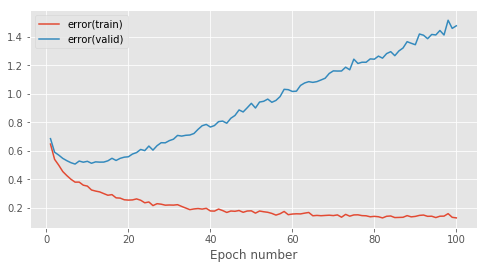

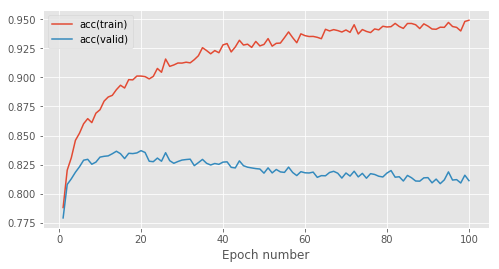

In [7]:
# Adam constant
learning_rate = 1e-3
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()
scheduler = ConstantLearningRateScheduler(learning_rate=learning_rate)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats_adam_constant = sum_stats/run_times

Epoch 1: 7.9s to complete
    error(train)=6.23e-01, acc(train)=7.96e-01, error(valid)=6.58e-01, acc(valid)=7.89e-01


Epoch 2: 8.0s to complete
    error(train)=5.29e-01, acc(train)=8.21e-01, error(valid)=5.92e-01, acc(valid)=8.08e-01


Epoch 3: 8.4s to complete
    error(train)=4.76e-01, acc(train)=8.37e-01, error(valid)=5.61e-01, acc(valid)=8.16e-01


Epoch 4: 8.3s to complete
    error(train)=4.39e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.21e-01


Epoch 5: 8.0s to complete
    error(train)=4.14e-01, acc(train)=8.53e-01, error(valid)=5.26e-01, acc(valid)=8.27e-01


Epoch 6: 8.4s to complete
    error(train)=3.98e-01, acc(train)=8.58e-01, error(valid)=5.32e-01, acc(valid)=8.25e-01


Epoch 7: 9.6s to complete
    error(train)=3.99e-01, acc(train)=8.55e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


Epoch 8: 11.0s to complete
    error(train)=3.83e-01, acc(train)=8.60e-01, error(valid)=5.51e-01, acc(valid)=8.20e-01


Epoch 9: 11.5s to complete
    error(train)=3.60e-01, acc(train)=8.69e-01, error(valid)=5.40e-01, acc(valid)=8.26e-01


Epoch 10: 10.8s to complete
    error(train)=3.38e-01, acc(train)=8.74e-01, error(valid)=5.31e-01, acc(valid)=8.34e-01


Epoch 11: 11.3s to complete
    error(train)=3.50e-01, acc(train)=8.71e-01, error(valid)=5.71e-01, acc(valid)=8.23e-01


Epoch 12: 11.5s to complete
    error(train)=3.35e-01, acc(train)=8.73e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 13: 11.4s to complete
    error(train)=3.18e-01, acc(train)=8.80e-01, error(valid)=5.53e-01, acc(valid)=8.29e-01


Epoch 14: 11.3s to complete
    error(train)=3.33e-01, acc(train)=8.75e-01, error(valid)=5.83e-01, acc(valid)=8.24e-01


Epoch 15: 10.6s to complete
    error(train)=3.25e-01, acc(train)=8.78e-01, error(valid)=5.80e-01, acc(valid)=8.26e-01


Epoch 16: 10.2s to complete
    error(train)=3.04e-01, acc(train)=8.84e-01, error(valid)=5.82e-01, acc(valid)=8.27e-01


Epoch 17: 10.8s to complete
    error(train)=3.17e-01, acc(train)=8.79e-01, error(valid)=6.09e-01, acc(valid)=8.18e-01


Epoch 18: 9.5s to complete
    error(train)=3.00e-01, acc(train)=8.85e-01, error(valid)=6.06e-01, acc(valid)=8.25e-01


Epoch 19: 11.3s to complete
    error(train)=2.90e-01, acc(train)=8.89e-01, error(valid)=6.03e-01, acc(valid)=8.27e-01


Epoch 20: 12.0s to complete
    error(train)=2.72e-01, acc(train)=8.96e-01, error(valid)=6.06e-01, acc(valid)=8.30e-01


Epoch 21: 11.4s to complete
    error(train)=2.81e-01, acc(train)=8.90e-01, error(valid)=6.16e-01, acc(valid)=8.22e-01


Epoch 22: 11.4s to complete
    error(train)=2.99e-01, acc(train)=8.84e-01, error(valid)=6.36e-01, acc(valid)=8.18e-01


Epoch 23: 11.0s to complete
    error(train)=2.70e-01, acc(train)=8.94e-01, error(valid)=6.48e-01, acc(valid)=8.24e-01


Epoch 24: 11.0s to complete
    error(train)=2.73e-01, acc(train)=8.94e-01, error(valid)=6.62e-01, acc(valid)=8.26e-01


Epoch 25: 10.8s to complete
    error(train)=2.83e-01, acc(train)=8.90e-01, error(valid)=6.68e-01, acc(valid)=8.18e-01


Epoch 26: 11.4s to complete
    error(train)=2.67e-01, acc(train)=8.96e-01, error(valid)=6.77e-01, acc(valid)=8.25e-01


Epoch 27: 11.9s to complete
    error(train)=2.59e-01, acc(train)=8.98e-01, error(valid)=6.83e-01, acc(valid)=8.23e-01


Epoch 28: 11.0s to complete
    error(train)=2.65e-01, acc(train)=8.95e-01, error(valid)=6.88e-01, acc(valid)=8.24e-01


Epoch 29: 11.3s to complete
    error(train)=2.64e-01, acc(train)=8.97e-01, error(valid)=6.96e-01, acc(valid)=8.23e-01


Epoch 30: 10.3s to complete
    error(train)=2.52e-01, acc(train)=9.01e-01, error(valid)=7.02e-01, acc(valid)=8.20e-01


Epoch 31: 11.2s to complete
    error(train)=2.69e-01, acc(train)=8.96e-01, error(valid)=7.29e-01, acc(valid)=8.18e-01


Epoch 32: 11.2s to complete
    error(train)=2.68e-01, acc(train)=8.96e-01, error(valid)=7.49e-01, acc(valid)=8.19e-01


Epoch 33: 11.5s to complete
    error(train)=2.69e-01, acc(train)=8.95e-01, error(valid)=7.49e-01, acc(valid)=8.18e-01


Epoch 34: 11.5s to complete
    error(train)=2.46e-01, acc(train)=9.03e-01, error(valid)=7.60e-01, acc(valid)=8.21e-01


Epoch 35: 11.8s to complete
    error(train)=2.43e-01, acc(train)=9.04e-01, error(valid)=7.27e-01, acc(valid)=8.21e-01


Epoch 36: 11.1s to complete
    error(train)=2.41e-01, acc(train)=9.03e-01, error(valid)=7.28e-01, acc(valid)=8.21e-01


Epoch 37: 11.7s to complete
    error(train)=2.53e-01, acc(train)=9.00e-01, error(valid)=7.98e-01, acc(valid)=8.14e-01


Epoch 38: 10.6s to complete
    error(train)=2.48e-01, acc(train)=9.02e-01, error(valid)=7.83e-01, acc(valid)=8.17e-01


Epoch 39: 11.2s to complete
    error(train)=2.42e-01, acc(train)=9.02e-01, error(valid)=7.90e-01, acc(valid)=8.17e-01


Epoch 40: 12.0s to complete
    error(train)=2.55e-01, acc(train)=8.98e-01, error(valid)=8.15e-01, acc(valid)=8.19e-01


Epoch 41: 10.8s to complete
    error(train)=2.38e-01, acc(train)=9.05e-01, error(valid)=8.11e-01, acc(valid)=8.21e-01


Epoch 42: 11.4s to complete
    error(train)=2.39e-01, acc(train)=9.02e-01, error(valid)=8.05e-01, acc(valid)=8.16e-01


Epoch 43: 10.8s to complete
    error(train)=2.28e-01, acc(train)=9.08e-01, error(valid)=8.14e-01, acc(valid)=8.21e-01


Epoch 44: 11.1s to complete
    error(train)=2.54e-01, acc(train)=9.01e-01, error(valid)=8.52e-01, acc(valid)=8.18e-01


Epoch 45: 11.5s to complete
    error(train)=2.32e-01, acc(train)=9.07e-01, error(valid)=8.44e-01, acc(valid)=8.19e-01


Epoch 46: 11.9s to complete
    error(train)=2.30e-01, acc(train)=9.08e-01, error(valid)=8.71e-01, acc(valid)=8.18e-01


Epoch 47: 11.3s to complete
    error(train)=2.47e-01, acc(train)=9.02e-01, error(valid)=9.06e-01, acc(valid)=8.12e-01


Epoch 48: 11.6s to complete
    error(train)=2.26e-01, acc(train)=9.08e-01, error(valid)=8.75e-01, acc(valid)=8.17e-01


Epoch 49: 11.3s to complete
    error(train)=2.35e-01, acc(train)=9.06e-01, error(valid)=9.05e-01, acc(valid)=8.14e-01


Epoch 50: 11.2s to complete
    error(train)=2.29e-01, acc(train)=9.09e-01, error(valid)=9.09e-01, acc(valid)=8.15e-01


Epoch 51: 11.1s to complete
    error(train)=2.23e-01, acc(train)=9.10e-01, error(valid)=9.03e-01, acc(valid)=8.18e-01


Epoch 52: 11.1s to complete
    error(train)=2.41e-01, acc(train)=9.04e-01, error(valid)=9.37e-01, acc(valid)=8.10e-01


Epoch 53: 11.6s to complete
    error(train)=2.35e-01, acc(train)=9.07e-01, error(valid)=9.31e-01, acc(valid)=8.16e-01


Epoch 54: 10.4s to complete
    error(train)=2.20e-01, acc(train)=9.12e-01, error(valid)=9.35e-01, acc(valid)=8.14e-01


Epoch 55: 12.0s to complete
    error(train)=2.23e-01, acc(train)=9.09e-01, error(valid)=9.56e-01, acc(valid)=8.14e-01


Epoch 56: 11.5s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=9.45e-01, acc(valid)=8.18e-01


Epoch 57: 11.7s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=9.61e-01, acc(valid)=8.19e-01


Epoch 58: 10.9s to complete
    error(train)=2.13e-01, acc(train)=9.14e-01, error(valid)=9.82e-01, acc(valid)=8.16e-01


Epoch 59: 11.0s to complete
    error(train)=2.10e-01, acc(train)=9.15e-01, error(valid)=9.87e-01, acc(valid)=8.19e-01


Epoch 60: 11.3s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=1.02e+00, acc(valid)=8.18e-01


Epoch 61: 11.1s to complete
    error(train)=2.04e-01, acc(train)=9.17e-01, error(valid)=1.00e+00, acc(valid)=8.17e-01


Epoch 62: 11.3s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=1.01e+00, acc(valid)=8.16e-01


Epoch 63: 11.7s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=1.01e+00, acc(valid)=8.17e-01


Epoch 64: 11.1s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=1.05e+00, acc(valid)=8.17e-01


Epoch 65: 10.7s to complete
    error(train)=1.92e-01, acc(train)=9.22e-01, error(valid)=1.01e+00, acc(valid)=8.20e-01


Epoch 66: 12.0s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=1.04e+00, acc(valid)=8.15e-01


Epoch 67: 11.9s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=1.04e+00, acc(valid)=8.19e-01


Epoch 68: 9.9s to complete
    error(train)=2.03e-01, acc(train)=9.19e-01, error(valid)=1.06e+00, acc(valid)=8.19e-01


Epoch 69: 11.3s to complete
    error(train)=2.03e-01, acc(train)=9.20e-01, error(valid)=1.09e+00, acc(valid)=8.17e-01


Epoch 70: 10.8s to complete
    error(train)=1.94e-01, acc(train)=9.21e-01, error(valid)=1.08e+00, acc(valid)=8.18e-01


Epoch 71: 11.6s to complete
    error(train)=1.84e-01, acc(train)=9.23e-01, error(valid)=1.06e+00, acc(valid)=8.14e-01


Epoch 72: 11.8s to complete
    error(train)=2.17e-01, acc(train)=9.17e-01, error(valid)=1.13e+00, acc(valid)=8.14e-01


Epoch 73: 10.4s to complete
    error(train)=1.98e-01, acc(train)=9.20e-01, error(valid)=1.10e+00, acc(valid)=8.16e-01


Epoch 74: 11.2s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=1.10e+00, acc(valid)=8.14e-01


Epoch 75: 10.8s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=1.16e+00, acc(valid)=8.14e-01


Epoch 76: 10.9s to complete
    error(train)=1.94e-01, acc(train)=9.20e-01, error(valid)=1.15e+00, acc(valid)=8.13e-01


Epoch 77: 11.2s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=1.17e+00, acc(valid)=8.15e-01


Epoch 78: 10.8s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=1.23e+00, acc(valid)=8.17e-01


Epoch 79: 11.3s to complete
    error(train)=1.85e-01, acc(train)=9.26e-01, error(valid)=1.18e+00, acc(valid)=8.15e-01


Epoch 80: 10.4s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=1.17e+00, acc(valid)=8.17e-01


Epoch 81: 11.9s to complete
    error(train)=1.78e-01, acc(train)=9.28e-01, error(valid)=1.18e+00, acc(valid)=8.18e-01


Epoch 82: 12.0s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=1.17e+00, acc(valid)=8.20e-01


Epoch 83: 11.1s to complete
    error(train)=1.88e-01, acc(train)=9.23e-01, error(valid)=1.18e+00, acc(valid)=8.11e-01


Epoch 84: 10.9s to complete
    error(train)=1.96e-01, acc(train)=9.22e-01, error(valid)=1.26e+00, acc(valid)=8.16e-01


Epoch 85: 11.4s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=1.25e+00, acc(valid)=8.19e-01


Epoch 86: 11.6s to complete
    error(train)=1.89e-01, acc(train)=9.24e-01, error(valid)=1.26e+00, acc(valid)=8.14e-01


Epoch 87: 11.0s to complete
    error(train)=1.76e-01, acc(train)=9.26e-01, error(valid)=1.28e+00, acc(valid)=8.13e-01


Epoch 88: 10.2s to complete
    error(train)=1.82e-01, acc(train)=9.25e-01, error(valid)=1.32e+00, acc(valid)=8.08e-01


Epoch 89: 11.5s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=1.30e+00, acc(valid)=8.13e-01


Epoch 90: 11.4s to complete
    error(train)=1.90e-01, acc(train)=9.26e-01, error(valid)=1.36e+00, acc(valid)=8.12e-01


Epoch 91: 11.6s to complete
    error(train)=1.73e-01, acc(train)=9.31e-01, error(valid)=1.32e+00, acc(valid)=8.16e-01


Epoch 92: 11.8s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=1.34e+00, acc(valid)=8.13e-01


Epoch 93: 11.6s to complete
    error(train)=1.64e-01, acc(train)=9.32e-01, error(valid)=1.32e+00, acc(valid)=8.18e-01


Epoch 94: 11.5s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=1.34e+00, acc(valid)=8.19e-01


Epoch 95: 11.2s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=1.39e+00, acc(valid)=8.15e-01


Epoch 96: 10.5s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=1.36e+00, acc(valid)=8.13e-01


Epoch 97: 11.0s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=1.38e+00, acc(valid)=8.18e-01


Epoch 98: 11.4s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=1.43e+00, acc(valid)=8.17e-01


Epoch 99: 10.3s to complete
    error(train)=1.75e-01, acc(train)=9.32e-01, error(valid)=1.46e+00, acc(valid)=8.16e-01


Epoch 100: 11.6s to complete
    error(train)=1.45e-01, acc(train)=9.39e-01, error(valid)=1.40e+00, acc(valid)=8.15e-01


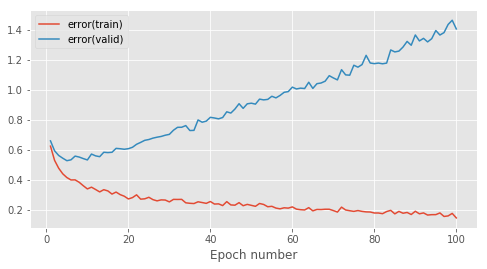

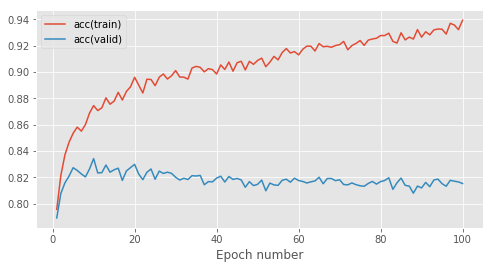

In [8]:
# Adam no restarts
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()
min_learning_rate = 1e-4
max_learning_rate = 1e-3
total_iters_per_period = 200
max_learning_rate_discount_factor = 1
period_iteration_expansion_factor = 1
scheduler = CosineAnnealingWithWarmRestarts(
    min_learning_rate, max_learning_rate, total_iters_per_period, 
    max_learning_rate_discount_factor, period_iteration_expansion_factor)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats_adam_no_restarts = sum_stats/run_times

Epoch 1: 6.8s to complete
    error(train)=6.91e-01, acc(train)=7.79e-01, error(valid)=7.16e-01, acc(valid)=7.76e-01


Epoch 2: 8.3s to complete
    error(train)=5.50e-01, acc(train)=8.19e-01, error(valid)=6.04e-01, acc(valid)=8.01e-01


Epoch 3: 7.7s to complete
    error(train)=4.95e-01, acc(train)=8.33e-01, error(valid)=5.62e-01, acc(valid)=8.14e-01


Epoch 4: 8.4s to complete
    error(train)=4.45e-01, acc(train)=8.49e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


Epoch 5: 8.2s to complete
    error(train)=4.21e-01, acc(train)=8.53e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


Epoch 6: 8.9s to complete
    error(train)=4.01e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


Epoch 7: 8.4s to complete
    error(train)=3.77e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.34e-01


Epoch 8: 9.1s to complete
    error(train)=3.61e-01, acc(train)=8.70e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


Epoch 9: 8.7s to complete
    error(train)=3.37e-01, acc(train)=8.79e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


Epoch 10: 8.6s to complete
    error(train)=3.26e-01, acc(train)=8.82e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


Epoch 11: 8.4s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


Epoch 12: 9.1s to complete
    error(train)=2.94e-01, acc(train)=8.94e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


Epoch 13: 9.0s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


Epoch 14: 9.3s to complete
    error(train)=2.74e-01, acc(train)=9.00e-01, error(valid)=4.80e-01, acc(valid)=8.44e-01


Epoch 15: 10.2s to complete
    error(train)=2.63e-01, acc(train)=9.04e-01, error(valid)=4.78e-01, acc(valid)=8.49e-01


Epoch 16: 9.3s to complete
    error(train)=2.57e-01, acc(train)=9.06e-01, error(valid)=4.85e-01, acc(valid)=8.48e-01


Epoch 17: 9.4s to complete
    error(train)=2.46e-01, acc(train)=9.10e-01, error(valid)=4.82e-01, acc(valid)=8.49e-01


Epoch 18: 9.4s to complete
    error(train)=2.37e-01, acc(train)=9.13e-01, error(valid)=4.84e-01, acc(valid)=8.50e-01


Epoch 19: 10.5s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=4.84e-01, acc(valid)=8.47e-01


Epoch 20: 9.2s to complete
    error(train)=2.27e-01, acc(train)=9.17e-01, error(valid)=4.87e-01, acc(valid)=8.49e-01


Epoch 21: 9.2s to complete
    error(train)=2.23e-01, acc(train)=9.20e-01, error(valid)=4.85e-01, acc(valid)=8.50e-01


Epoch 22: 9.4s to complete
    error(train)=2.20e-01, acc(train)=9.20e-01, error(valid)=4.90e-01, acc(valid)=8.50e-01


Epoch 23: 9.4s to complete
    error(train)=2.16e-01, acc(train)=9.22e-01, error(valid)=4.91e-01, acc(valid)=8.49e-01


Epoch 24: 9.5s to complete
    error(train)=2.14e-01, acc(train)=9.23e-01, error(valid)=4.92e-01, acc(valid)=8.49e-01


Epoch 25: 9.7s to complete
    error(train)=2.92e-01, acc(train)=8.89e-01, error(valid)=5.41e-01, acc(valid)=8.33e-01


Epoch 26: 9.7s to complete
    error(train)=2.81e-01, acc(train)=8.93e-01, error(valid)=5.39e-01, acc(valid)=8.37e-01


Epoch 27: 8.9s to complete
    error(train)=2.66e-01, acc(train)=8.99e-01, error(valid)=5.38e-01, acc(valid)=8.38e-01


Epoch 28: 8.0s to complete
    error(train)=2.60e-01, acc(train)=9.01e-01, error(valid)=5.37e-01, acc(valid)=8.38e-01


Epoch 29: 9.0s to complete
    error(train)=2.61e-01, acc(train)=9.00e-01, error(valid)=5.58e-01, acc(valid)=8.36e-01


Epoch 30: 9.3s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=5.49e-01, acc(valid)=8.39e-01


Epoch 31: 9.6s to complete
    error(train)=2.49e-01, acc(train)=9.01e-01, error(valid)=5.61e-01, acc(valid)=8.30e-01


Epoch 32: 8.6s to complete
    error(train)=2.48e-01, acc(train)=9.04e-01, error(valid)=5.70e-01, acc(valid)=8.33e-01


Epoch 33: 9.8s to complete
    error(train)=2.55e-01, acc(train)=9.01e-01, error(valid)=6.00e-01, acc(valid)=8.31e-01


Epoch 34: 7.7s to complete
    error(train)=2.37e-01, acc(train)=9.08e-01, error(valid)=5.87e-01, acc(valid)=8.36e-01


Epoch 35: 8.9s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=5.90e-01, acc(valid)=8.37e-01


Epoch 36: 8.7s to complete
    error(train)=2.33e-01, acc(train)=9.08e-01, error(valid)=6.12e-01, acc(valid)=8.31e-01


Epoch 37: 8.8s to complete
    error(train)=2.18e-01, acc(train)=9.15e-01, error(valid)=6.07e-01, acc(valid)=8.33e-01


Epoch 38: 9.1s to complete
    error(train)=2.19e-01, acc(train)=9.14e-01, error(valid)=6.29e-01, acc(valid)=8.31e-01


Epoch 39: 10.4s to complete
    error(train)=2.14e-01, acc(train)=9.16e-01, error(valid)=6.19e-01, acc(valid)=8.36e-01


Epoch 40: 9.6s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=6.35e-01, acc(valid)=8.27e-01


Epoch 41: 8.9s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=6.42e-01, acc(valid)=8.33e-01


Epoch 42: 9.3s to complete
    error(train)=2.00e-01, acc(train)=9.21e-01, error(valid)=6.51e-01, acc(valid)=8.33e-01


Epoch 43: 9.3s to complete
    error(train)=2.12e-01, acc(train)=9.16e-01, error(valid)=6.87e-01, acc(valid)=8.27e-01


Epoch 44: 9.2s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=6.83e-01, acc(valid)=8.34e-01


Epoch 45: 9.4s to complete
    error(train)=1.83e-01, acc(train)=9.27e-01, error(valid)=6.76e-01, acc(valid)=8.31e-01


Epoch 46: 9.2s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=6.90e-01, acc(valid)=8.32e-01


Epoch 47: 9.5s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=7.05e-01, acc(valid)=8.30e-01


Epoch 48: 8.2s to complete
    error(train)=1.67e-01, acc(train)=9.34e-01, error(valid)=7.09e-01, acc(valid)=8.32e-01


Epoch 49: 9.9s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01


Epoch 50: 9.9s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.34e-01, acc(valid)=8.30e-01


Epoch 51: 11.2s to complete
    error(train)=1.54e-01, acc(train)=9.38e-01, error(valid)=7.21e-01, acc(valid)=8.37e-01


Epoch 52: 11.6s to complete
    error(train)=1.64e-01, acc(train)=9.35e-01, error(valid)=7.59e-01, acc(valid)=8.30e-01


Epoch 53: 10.4s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=7.71e-01, acc(valid)=8.29e-01


Epoch 54: 9.6s to complete
    error(train)=1.48e-01, acc(train)=9.41e-01, error(valid)=7.72e-01, acc(valid)=8.26e-01


Epoch 55: 9.8s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=8.07e-01, acc(valid)=8.25e-01


Epoch 56: 8.7s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=7.96e-01, acc(valid)=8.29e-01


Epoch 57: 8.9s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=8.15e-01, acc(valid)=8.28e-01


Epoch 58: 9.1s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=8.14e-01, acc(valid)=8.29e-01


Epoch 59: 9.6s to complete
    error(train)=1.35e-01, acc(train)=9.46e-01, error(valid)=8.24e-01, acc(valid)=8.29e-01


Epoch 60: 9.5s to complete
    error(train)=1.32e-01, acc(train)=9.46e-01, error(valid)=8.49e-01, acc(valid)=8.26e-01


Epoch 61: 9.4s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=8.54e-01, acc(valid)=8.31e-01


Epoch 62: 9.3s to complete
    error(train)=1.28e-01, acc(train)=9.48e-01, error(valid)=8.69e-01, acc(valid)=8.29e-01


Epoch 63: 9.4s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=8.84e-01, acc(valid)=8.27e-01


Epoch 64: 9.3s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=9.03e-01, acc(valid)=8.27e-01


Epoch 65: 12.3s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=8.93e-01, acc(valid)=8.30e-01


Epoch 66: 11.5s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=9.11e-01, acc(valid)=8.28e-01


Epoch 67: 10.8s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=9.23e-01, acc(valid)=8.27e-01


Epoch 68: 11.3s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=9.50e-01, acc(valid)=8.25e-01


Epoch 69: 9.9s to complete
    error(train)=1.00e-01, acc(train)=9.59e-01, error(valid)=9.52e-01, acc(valid)=8.26e-01


Epoch 70: 10.2s to complete
    error(train)=9.86e-02, acc(train)=9.61e-01, error(valid)=9.77e-01, acc(valid)=8.26e-01


Epoch 71: 9.6s to complete
    error(train)=9.93e-02, acc(train)=9.61e-01, error(valid)=9.91e-01, acc(valid)=8.26e-01


Epoch 72: 9.9s to complete
    error(train)=9.73e-02, acc(train)=9.62e-01, error(valid)=9.98e-01, acc(valid)=8.22e-01


Epoch 73: 9.1s to complete
    error(train)=9.31e-02, acc(train)=9.64e-01, error(valid)=1.01e+00, acc(valid)=8.26e-01


Epoch 74: 10.1s to complete
    error(train)=8.97e-02, acc(train)=9.64e-01, error(valid)=1.02e+00, acc(valid)=8.23e-01


Epoch 75: 10.3s to complete
    error(train)=8.48e-02, acc(train)=9.68e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


Epoch 76: 9.9s to complete
    error(train)=8.44e-02, acc(train)=9.67e-01, error(valid)=1.05e+00, acc(valid)=8.26e-01


Epoch 77: 11.0s to complete
    error(train)=8.47e-02, acc(train)=9.67e-01, error(valid)=1.06e+00, acc(valid)=8.26e-01


Epoch 78: 10.4s to complete
    error(train)=7.99e-02, acc(train)=9.70e-01, error(valid)=1.06e+00, acc(valid)=8.27e-01


Epoch 79: 10.8s to complete
    error(train)=7.96e-02, acc(train)=9.70e-01, error(valid)=1.07e+00, acc(valid)=8.25e-01


Epoch 80: 10.8s to complete
    error(train)=7.86e-02, acc(train)=9.70e-01, error(valid)=1.09e+00, acc(valid)=8.26e-01


Epoch 81: 10.6s to complete
    error(train)=7.52e-02, acc(train)=9.71e-01, error(valid)=1.10e+00, acc(valid)=8.25e-01


Epoch 82: 9.4s to complete
    error(train)=7.33e-02, acc(train)=9.73e-01, error(valid)=1.11e+00, acc(valid)=8.26e-01


Epoch 83: 11.0s to complete
    error(train)=7.25e-02, acc(train)=9.73e-01, error(valid)=1.12e+00, acc(valid)=8.26e-01


Epoch 84: 10.0s to complete
    error(train)=7.22e-02, acc(train)=9.72e-01, error(valid)=1.13e+00, acc(valid)=8.26e-01


Epoch 85: 9.6s to complete
    error(train)=6.99e-02, acc(train)=9.73e-01, error(valid)=1.14e+00, acc(valid)=8.26e-01


Epoch 86: 12.3s to complete
    error(train)=6.94e-02, acc(train)=9.74e-01, error(valid)=1.15e+00, acc(valid)=8.26e-01


Epoch 87: 10.3s to complete
    error(train)=6.87e-02, acc(train)=9.74e-01, error(valid)=1.16e+00, acc(valid)=8.26e-01


Epoch 88: 9.6s to complete
    error(train)=6.62e-02, acc(train)=9.75e-01, error(valid)=1.18e+00, acc(valid)=8.24e-01


Epoch 89: 12.2s to complete
    error(train)=6.56e-02, acc(train)=9.76e-01, error(valid)=1.18e+00, acc(valid)=8.25e-01


Epoch 90: 9.6s to complete
    error(train)=6.37e-02, acc(train)=9.77e-01, error(valid)=1.20e+00, acc(valid)=8.25e-01


Epoch 91: 11.3s to complete
    error(train)=6.45e-02, acc(train)=9.76e-01, error(valid)=1.21e+00, acc(valid)=8.26e-01


Epoch 92: 9.3s to complete
    error(train)=6.22e-02, acc(train)=9.77e-01, error(valid)=1.21e+00, acc(valid)=8.25e-01


Epoch 93: 10.5s to complete
    error(train)=6.17e-02, acc(train)=9.77e-01, error(valid)=1.22e+00, acc(valid)=8.24e-01


Epoch 94: 10.1s to complete
    error(train)=6.12e-02, acc(train)=9.78e-01, error(valid)=1.23e+00, acc(valid)=8.25e-01


Epoch 95: 9.5s to complete
    error(train)=6.00e-02, acc(train)=9.78e-01, error(valid)=1.25e+00, acc(valid)=8.25e-01


Epoch 96: 11.2s to complete
    error(train)=5.87e-02, acc(train)=9.79e-01, error(valid)=1.25e+00, acc(valid)=8.24e-01


Epoch 97: 10.8s to complete
    error(train)=5.84e-02, acc(train)=9.79e-01, error(valid)=1.26e+00, acc(valid)=8.23e-01


Epoch 98: 9.8s to complete
    error(train)=5.82e-02, acc(train)=9.79e-01, error(valid)=1.26e+00, acc(valid)=8.22e-01


Epoch 99: 10.2s to complete
    error(train)=5.72e-02, acc(train)=9.79e-01, error(valid)=1.28e+00, acc(valid)=8.23e-01


Epoch 100: 10.1s to complete
    error(train)=1.72e-01, acc(train)=9.33e-01, error(valid)=1.17e+00, acc(valid)=8.17e-01


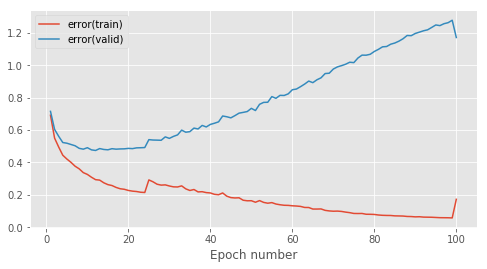

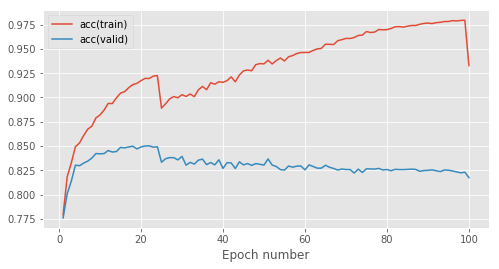

In [9]:
# Adam restarts
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule()
min_learning_rate = 1e-4
max_learning_rate = 1e-3
total_iters_per_period = 25
max_learning_rate_discount_factor = 0.9
period_iteration_expansion_factor = 3
scheduler = CosineAnnealingWithWarmRestarts(
    min_learning_rate, max_learning_rate, total_iters_per_period, 
    max_learning_rate_discount_factor, period_iteration_expansion_factor)

five_stats = np.empty((run_times,num_epochs+1,4))
for count in range(0,run_times):
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2, optimiser = train_model_and_plot_stats(
        scheduler, model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    five_stats[count,:,:]=stats
    
sum_stats = np.sum(five_stats,axis=0)
stats_adam_restarts = sum_stats/run_times

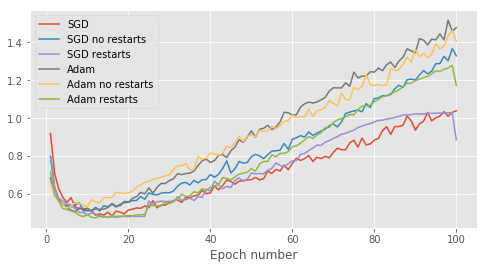

In [10]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_sgd_constant.shape[0]) * stats_interval, stats_sgd_constant[1:, keys['error(valid)']], label='SGD')
ax.plot(np.arange(1, stats_sgd_no_restarts.shape[0]) * stats_interval, stats_sgd_no_restarts[1:, keys['error(valid)']], label='SGD no restarts')
ax.plot(np.arange(1, stats_sgd_restarts.shape[0]) * stats_interval, stats_sgd_restarts[1:, keys['error(valid)']], label='SGD restarts')
ax.plot(np.arange(1, stats_adam_constant.shape[0]) * stats_interval, stats_adam_constant[1:, keys['error(valid)']], label='Adam')
ax.plot(np.arange(1, stats_adam_no_restarts.shape[0]) * stats_interval, stats_adam_no_restarts[1:, keys['error(valid)']], label='Adam no restarts')
ax.plot(np.arange(1, stats_adam_restarts.shape[0]) * stats_interval, stats_adam_restarts[1:, keys['error(valid)']], label='Adam restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task3/fig_val_error.pdf')

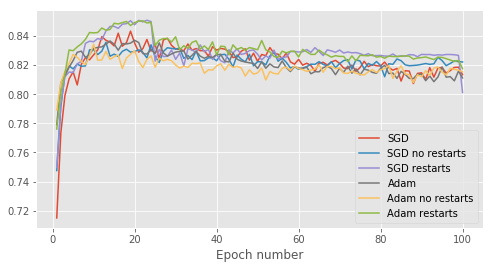

In [11]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_sgd_constant.shape[0]) * stats_interval, stats_sgd_constant[1:, keys['acc(valid)']], label='SGD')
ax.plot(np.arange(1, stats_sgd_no_restarts.shape[0]) * stats_interval, stats_sgd_no_restarts[1:, keys['acc(valid)']], label='SGD no restarts')
ax.plot(np.arange(1, stats_sgd_restarts.shape[0]) * stats_interval, stats_sgd_restarts[1:, keys['acc(valid)']], label='SGD restarts')
ax.plot(np.arange(1, stats_adam_constant.shape[0]) * stats_interval, stats_adam_constant[1:, keys['acc(valid)']], label='Adam')
ax.plot(np.arange(1, stats_adam_no_restarts.shape[0]) * stats_interval, stats_adam_no_restarts[1:, keys['acc(valid)']], label='Adam no restarts')
ax.plot(np.arange(1, stats_adam_restarts.shape[0]) * stats_interval, stats_adam_restarts[1:, keys['acc(valid)']], label='Adam restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task3/fig_val_acc.pdf')

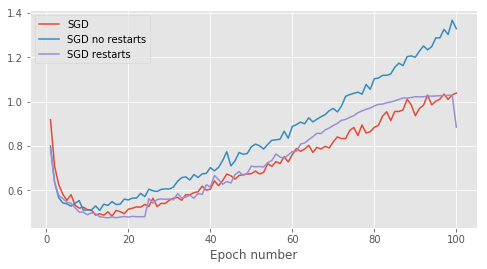

In [12]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_sgd_constant.shape[0]) * stats_interval, stats_sgd_constant[1:, keys['error(valid)']], label='SGD')
ax.plot(np.arange(1, stats_sgd_no_restarts.shape[0]) * stats_interval, stats_sgd_no_restarts[1:, keys['error(valid)']], label='SGD no restarts')
ax.plot(np.arange(1, stats_sgd_restarts.shape[0]) * stats_interval, stats_sgd_restarts[1:, keys['error(valid)']], label='SGD restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task3/sgd/sgd_error.pdf')

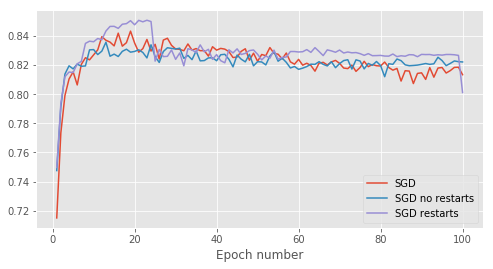

In [13]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_sgd_constant.shape[0]) * stats_interval, stats_sgd_constant[1:, keys['acc(valid)']], label='SGD')
ax.plot(np.arange(1, stats_sgd_no_restarts.shape[0]) * stats_interval, stats_sgd_no_restarts[1:, keys['acc(valid)']], label='SGD no restarts')
ax.plot(np.arange(1, stats_sgd_restarts.shape[0]) * stats_interval, stats_sgd_restarts[1:, keys['acc(valid)']], label='SGD restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task3/sgd/sgd_acc.pdf')

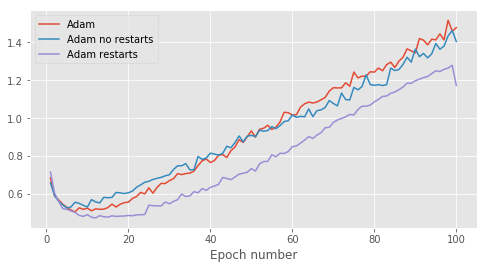

In [14]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_adam_constant.shape[0]) * stats_interval, stats_adam_constant[1:, keys['error(valid)']], label='Adam')
ax.plot(np.arange(1, stats_adam_no_restarts.shape[0]) * stats_interval, stats_adam_no_restarts[1:, keys['error(valid)']], label='Adam no restarts')
ax.plot(np.arange(1, stats_adam_restarts.shape[0]) * stats_interval, stats_adam_restarts[1:, keys['error(valid)']], label='Adam restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task3/adam/adam_error.pdf')

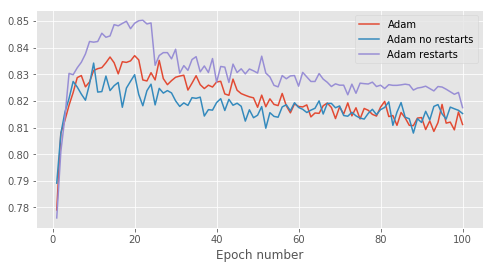

In [15]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats_adam_constant.shape[0]) * stats_interval, stats_adam_constant[1:, keys['acc(valid)']], label='Adam')
ax.plot(np.arange(1, stats_adam_no_restarts.shape[0]) * stats_interval, stats_adam_no_restarts[1:, keys['acc(valid)']], label='Adam no restarts')
ax.plot(np.arange(1, stats_adam_restarts.shape[0]) * stats_interval, stats_adam_restarts[1:, keys['acc(valid)']], label='Adam restarts')
ax.legend(loc=0)
ax.set_xlabel('Epoch number')
plt.show()
fig.savefig('res/figs/task3/adam/adam_acc.pdf')